In [1]:
import numpy as np
import pandas as pd
import itertools as it
import heapq as hq
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("C:/Users/Tobias Giesgen/PycharmProjects/gempy")
sys.path.append("../")
import bayseg
import gempy as gp

In [2]:
data_s3 = pd.read_csv("../data/GemPy_models/Synthetic_well_data/gempy_model_fold_tut3_s5_5.csv")

#### BaySeg Analysis

In [3]:
# define measurement names 
feature_names = ['feature1','feature2','feature3','feature4']

# define borehole names
boreholes = []
for i in range(10):
    boreholes.append('BH%s'%str(i+1))

In [4]:
feature_vectors_norm = bayseg.normalize_feature_vectors(data_s3.loc[:,feature_names])

In [5]:
# n, nft = bayseg.test_bic(feature_vectors_norm, 15)

In [6]:
clf = bayseg.BaySeg(feature_vectors_norm, 4, data_s3 , feature_names, boreholes, 
                    gp_resolution = 51, plot = '2dy', inc_gempy=True, beta_init=0.6)

In [ ]:
%matplotlib notebook

clf.fit(200, # number of iterations
        beta_jump_length=0.02, 
        mu_jump_length=0.0005, 
        cov_volume_jump_length=0.00005, 
        theta_jump_length=0.0000005, verbose=False, plot= "2dy", fix_beta=False)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

Gempy model under construction:
Borehole zoning finished!
Compiling theano function...


INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '11344')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\Tobias Giesgen\AppData\Local\Theano\compiledir_Windows-10-10.0.17134-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.6.4-64\lock_dir


In [9]:
clf.beta_acc_ratio

array([1.86267531e+29, 1.27177519e-84, 1.75488690e+56, 1.27801173e+80,
       1.31531019e+73, 2.60482299e+11, 1.80489950e+02, 1.65125545e-54,
       4.01205216e+39, 4.01744352e+02, 1.17675981e-11, 4.38312857e+13,
       8.41482285e-10, 7.30934723e+13, 1.00147246e-30, 3.09989627e-15,
       1.23560819e+02, 6.24095543e-07, 2.39462547e-01, 1.86795787e-02,
       1.70740467e-13, 3.31008859e+05, 4.74512251e-01, 2.16673045e+06,
       9.53856189e-10, 2.68213425e+02, 1.37684428e+06, 7.17989873e+00,
       1.40794582e+02, 9.32317464e-04, 1.43889645e-01, 4.07786096e-02,
       3.88826941e-04, 5.09555948e+04, 2.60240385e-02, 3.12518718e+00,
       1.31931085e+01, 5.58028862e+00, 1.48317454e+00, 7.16006247e+00,
       1.55684775e+00, 1.83586454e-01, 8.85879296e-01, 1.71272855e+00,
       1.48090395e+00, 1.04583882e-01, 5.37234369e-01, 1.19144237e-01,
       1.02805905e+00, 1.63820259e-02, 6.25832074e-02, 6.29724340e-04,
       6.23910107e+00, 7.74650167e-01, 1.60437545e-01, 7.05162457e+00,
      

In [8]:
clf.betas

[0.6,
 0.6571704627218821,
 0.6571704627218821,
 0.7811670237891468,
 0.9922088407024379,
 1.2563467947989095,
 1.3104184771427811,
 1.3217686183334378,
 1.3217686183334378,
 1.5645479030598741,
 1.584404012212057,
 1.584404012212057,
 1.7022448740600264,
 1.7022448740600264,
 1.857562324845003,
 1.857562324845003,
 1.857562324845003,
 1.88572809121519,
 1.88572809121519,
 1.88572809121519,
 1.88572809121519,
 1.88572809121519,
 1.9696427694262517,
 1.9696427694262517,
 2.088716280700338,
 2.088716280700338,
 2.1414311464482605,
 2.3109122508295425,
 2.3404572785274835,
 2.429054753330969,
 2.429054753330969,
 2.429054753330969,
 2.429054753330969,
 2.429054753330969,
 2.697307584877767,
 2.697307584877767,
 2.737359509640717,
 2.839521614997915,
 2.924844703376446,
 2.9468246681195693,
 3.0569042196540246,
 3.0887835624260314,
 3.0887835624260314,
 3.07948272450727,
 3.1213280253649485,
 3.1555234495429336,
 2.9862256519003503,
 2.9469894714003604,
 2.9469894714003604,
 2.948542842912

In [43]:
clf.mus

[array([[-1.30152553,  0.84877875, -0.18625822,  0.02204522],
        [ 0.38204902, -1.09064181,  0.96337384,  0.86338421],
        [ 0.87117801, -0.20475651,  0.34564176,  0.21052135],
        [ 0.00908593,  0.4906916 , -1.15696341, -1.1228519 ]]),
 array([[-1.30152553,  0.84877875, -0.18625822,  0.02204522],
        [ 0.38204902, -1.09064181,  0.96337384,  0.86338421],
        [ 0.87932056, -0.21949772,  0.337709  ,  0.20039731],
        [ 0.00908593,  0.4906916 , -1.15696341, -1.1228519 ]]),
 array([[-1.30152553,  0.84877875, -0.18625822,  0.02204522],
        [ 0.38204902, -1.09064181,  0.96337384,  0.86338421],
        [ 0.88973715, -0.19282816,  0.35079275,  0.19561205],
        [ 0.00908593,  0.4906916 , -1.15696341, -1.1228519 ]]),
 array([[-1.31441511,  0.83879788, -0.20096409,  0.02611097],
        [ 0.40956446, -1.08335578,  0.96097148,  0.8427738 ],
        [ 0.92243107, -0.15925194,  0.34293583,  0.19909594],
        [ 0.00908593,  0.4906916 , -1.15696341, -1.1228519 ]]),


In [ ]:
 array([[ 0.86498006, -0.31212383,  0.35604388,  0.3106241 ],
        [ 0.34395499, -0.98978718,  1.02633622,  0.74622813],
        [ 0.09297629,  0.44459129, -1.10462796, -1.08741069],
        [-1.28780793,  0.78655323, -0.24378282,  0.0761951 ]])]

In [42]:
clf.storage_gibbs_e[-1]

array([[0.        , 0.72420672, 0.72420672, 0.72420672],
       [0.        , 1.44841343, 1.44841343, 1.44841343],
       [0.        , 1.44841343, 1.44841343, 1.44841343],
       ...,
       [1.44841343, 0.72420672, 0.72420672, 1.44841343],
       [1.44841343, 1.44841343, 0.        , 1.44841343],
       [0.72420672, 0.72420672, 0.        , 0.72420672]])

In [40]:
clf.storage_like_e

[array([[-0.3156228 , 13.78441709,  8.40478343,  0.68303415],
        [ 0.4090404 ,  9.4258982 ,  5.71076062,  7.11516603],
        [-0.84379014, 13.47254014, 10.42217263,  4.11806531],
        ...,
        [11.05439856,  4.75125327,  2.19808859, 17.32168852],
        [ 8.34140502,  2.96074116, -0.12370626,  3.84890316],
        [14.45814595,  2.69749049,  1.17790579, 15.417255  ]]),
 array([[-0.31826922, 13.77471968,  8.47248387,  0.67092875],
        [ 0.40469787,  9.44584928,  5.83972639,  7.13295889],
        [-0.8396689 , 13.46184454, 10.51795515,  4.135476  ],
        ...,
        [11.0722695 ,  4.76560985,  2.26920432, 17.32310382],
        [ 8.34347876,  2.96370489, -0.15452523,  3.84679179],
        [14.54764364,  2.70332675,  1.21662945, 15.41542111]]),
 array([[-0.31979977, 13.69852107,  8.41900445,  0.67583867],
        [ 0.40286789,  9.34824494,  5.74188889,  7.15291307],
        [-0.8404352 , 13.38224827, 10.48168003,  4.12705672],
        ...,
        [11.00874825,  4.77

In [39]:
# compare Gibbs energies calcluated from Gempy model 2D (X,Y) and BaySeg well data 1D (Z)
print('Gibbs energy GemPy   |    Gibbs energy bayseg      |     Likelihood')
print('______________________________________________________________________')
for i in np.arange(40,60):# len(clf.gempy_energy)):
    print(np.around(clf.storage_gempy_e[-1][i],2),'   |   ',
          np.around(clf.storage_gibbs_e[-1][i],2),'   |   ',
          np.around(clf.storage_like_e[-1][i],2))

Gibbs energy GemPy   |    Gibbs energy bayseg      |     Likelihood
______________________________________________________________________
[0.  2.9 2.9 2.9]    |    [0.72 1.45 1.45 0.72]    |    [ 1.79 21.11  7.24  2.19]
[0.  2.9 2.9 2.9]    |    [0.   1.45 1.45 1.45]    |    [-1.02  8.92  5.12  7.58]
[0.  2.9 2.9 2.9]    |    [0.   1.45 1.45 1.45]    |    [ 0.39 13.06  9.38 11.8 ]
[0.  2.9 2.9 2.9]    |    [0.   1.45 1.45 1.45]    |    [-0.43  7.47  4.83  6.59]
[0.  2.9 2.9 2.9]    |    [0.   1.45 1.45 1.45]    |    [ 0.31 15.7   9.12  7.58]
[0.  2.9 2.9 2.9]    |    [0.   1.45 1.45 1.45]    |    [-0.81  6.39  4.1   5.5 ]
[0.  2.9 2.9 2.9]    |    [0.   1.45 1.45 1.45]    |    [0.17 4.84 2.32 4.83]
[0.  2.9 2.9 2.9]    |    [0.72 0.72 1.45 1.45]    |    [ 0.35 12.54  2.94  1.45]
[0.  2.9 2.9 2.9]    |    [0.72 0.72 1.45 1.45]    |    [ 6.05 -0.94  3.84 12.1 ]
[2.9 0.  2.9 2.9]    |    [1.45 0.   1.45 1.45]    |    [17.34  2.53 10.09 19.48]
[2.9 0.  2.9 2.9]    |    [1.45 0.   1.45 1.4

In [30]:
# compare coordinates from GemPy grid and coordinates from raw well data (BaySeg)
print('Gempy coordinates        |      Well data coordinates')
print('_____________________________________________________')
for i in range(150):    
    print(clf.index_temp[clf.index_gempy[15+i*6]],'     |     ',clf.coords[15+i*6])

Gempy coordinates        |      Well data coordinates
_____________________________________________________
[144.79411  115.26471  -14.960784]      |      [145.3  115.3  -16.27]
[144.79411  115.26471  -23.509804]      |      [145.3  115.3  -22.58]
[144.79411  115.26471  -27.784313]      |      [145.3  115.3  -28.88]
[144.79411  115.26471  -36.333332]      |      [145.3  115.3  -35.17]
[144.79411 115.26471 -40.60784]      |      [145.3  115.3  -41.48]
[144.79411  115.26471  -49.156864]      |      [145.3  115.3  -47.78]
[144.79411  115.26471  -53.431374]      |      [145.3  115.3  -54.08]
[144.79411  115.26471  -61.980392]      |      [145.3  115.3  -60.38]
[144.79411  115.26471  -66.254906]      |      [145.3  115.3  -66.68]
[144.79411  115.26471  -74.803925]      |      [145.3  115.3  -72.97]
[144.79411 115.26471 -79.07843]      |      [145.3  115.3  -79.28]
[144.79411 115.26471 -87.62745]      |      [145.3  115.3  -85.58]
[144.79411 115.26471 -91.90196]      |      [145.3  115.3  -9

In [26]:
clf.storage_gempy_e[-1]

array([[0.        , 2.89682687, 2.89682687, 2.89682687],
       [0.        , 2.89682687, 2.89682687, 2.89682687],
       [0.        , 2.89682687, 2.89682687, 2.89682687],
       ...,
       [2.89682687, 2.89682687, 2.89682687, 0.        ],
       [2.89682687, 2.89682687, 2.89682687, 0.        ],
       [2.89682687, 2.89682687, 2.89682687, 0.        ]])

In [24]:
clf.storage_gempy_e[1][:60]

array([[0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272, 1.58233272, 1.58233272],
       [0.        , 1.58233272,

In [16]:
len(clf.gempy_energy)

1900

In [10]:
true_label = data_s3.layer.values.copy()

In [11]:
true_label[0:190]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
true_label[np.where(true_label == 3)] = 10
true_label[np.where(true_label == 0)] = 11
true_label[np.where(true_label == 2)] = 13
true_label[np.where(true_label == 1)] = 12
true_label = true_label -10

In [29]:
gempy3 = clf.labels

In [13]:
gempy3[-1][:190]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [15]:
# calculate number of incorrect voxels for each iteration i
diff_gempy3 = []
for i in range(len(gempy3)):
    diff_gempy3.append(len(np.where(gempy3[i] - true_label != 0)[0]))

In [22]:
gempy2 = clf.labels

In [23]:
gempy2[-1][:190]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
# calculate number of incorrect voxels for each iteration i
diff_gempy2 = []
for i in range(len(gempy2)):
    diff_gempy2.append(len(np.where(gempy2[i] - true_label != 0)[0]))

In [8]:
gempy = clf.labels

In [9]:
gempy[-1][:190]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1], dtype=int64)

In [13]:
# calculate number of incorrect voxels for each iteration i
diff_gempy = []
for i in range(len(gempy)):
    diff_gempy.append(len(np.where(gempy[i] - true_label != 0)[0]))

In [155]:
labels = clf.labels

In [156]:
labels[-1][:190]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [160]:
# calculate number of incorrect voxels for each iteration i
diff = []
for i in range(len(labels)):
    diff.append(len(np.where(labels[i] - true_label != 0)[0]))

### Convergence with GemPy

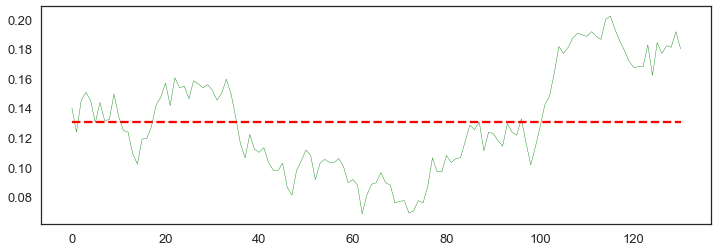

In [14]:
% matplotlib inline
plt.figure(figsize=(12,4))

plt.plot(range(0,len(gempy)), 
         np.asarray(diff_gempy)/len(gempy[-1]), 
         'g', linewidth=0.4)
plt.plot(range(0,len(gempy)), 
         np.ones(len(gempy))*np.mean(diff_gempy)/len(gempy[-1]),
         'r--',label='mean difference GemPy')

### Convergence without GemPy

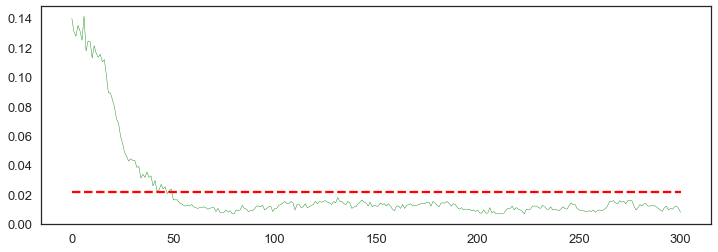

In [31]:
% matplotlib inline
plt.figure(figsize=(12,4))

plt.plot(range(0,len(gempy2)), 
         np.asarray(diff_gempy2)/len(gempy2[-1]), 
         'g', linewidth=0.4)
plt.plot(range(0,len(gempy2)), 
         np.ones(len(gempy2))*np.mean(diff_gempy2)/len(gempy2[-1]),
         'r--',label='mean difference GemPy')

### Convergence with GemPy

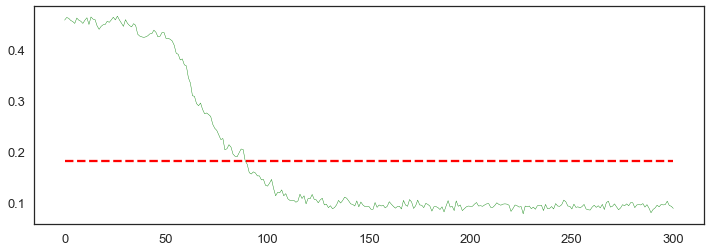

In [18]:
% matplotlib inline
plt.figure(figsize=(12,4))

plt.plot(range(0,len(gempy3)), 
         np.asarray(diff_gempy3)/len(gempy3[-1]), 
         'g', linewidth=0.4)
plt.plot(range(0,len(gempy3)), 
         np.ones(len(gempy3))*np.mean(diff_gempy3)/len(gempy3[-1]),
         'r--',label='mean difference GemPy')


In [35]:
labels_without_gempy = clf.labels

In [115]:
labels_without_gempy[0][:190]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 0, 2, 0, 2, 1, 2, 2, 3, 3, 3, 0, 0, 2, 0, 3, 3, 3,
       0, 3, 3, 3, 2, 2, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 3, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 1, 0, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 2, 0], dtype=int64)

In [130]:
labels_without_gempy2 = clf.labels

In [131]:
labels_without_gempy2[0][:190]

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 2, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 2,
       3, 2, 1, 1, 2, 2, 3, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 2, 3, 3, 2,
       0, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 2, 3, 0, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 1, 2, 2, 1, 0, 3, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 2, 3], dtype=int64)

In [42]:
labels_with_gempy = clf.labels

In [116]:
labels_with_gempy[0][:190]

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 2, 3, 2, 1, 2, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 0,
       3, 0, 0, 0, 2, 2, 3, 2, 0, 3, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 2,
       1, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 2, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 3], dtype=int64)

In [113]:
labels_with_gempy2 = clf.labels

In [117]:
labels_with_gempy2[0][:190]

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 3, 1, 3, 1, 2, 1, 1, 0, 3, 0, 3, 3, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 3, 1, 0, 3, 1, 0, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 1, 3, 3, 1,
       2, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 2, 1, 3, 3, 3,
       1, 0, 3, 3, 3, 3, 1, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 1], dtype=int64)

In [106]:
np.savetxt('labels_with_gempy2.csv', labels_with_gempy, delimiter=',')

In [109]:
a = np.loadtxt('labels_with_gempy2.csv', dtype = 'str')

In [93]:
# calculate number of incorrect voxels for each iteration i
diff_without_gempy = []
for i in range(len(labels_without_gempy)):
    diff_without_gempy.append(len(np.where(labels_without_gempy[i] - true_label != 0)[0]))

In [135]:
# calculate number of incorrect voxels for each iteration i
diff_without_gempy2 = []
for i in range(len(labels_without_gempy2)):
    diff_without_gempy2.append(len(np.where(labels_without_gempy2[i] - true_label != 0)[0]))

In [125]:
# calculate number of incorrect voxels for each iteration i
diff_with_gempy = []
for i in range(len(labels_with_gempy)):
    diff_with_gempy.append(len(np.where(labels_with_gempy[i] - true_label != 0)[0]))

In [121]:
# calculate number of incorrect voxels for each iteration i
diff_with_gempy2 = []
for i in range(len(labels_with_gempy2)):
    diff_with_gempy2.append(len(np.where(labels_with_gempy2[i] - true_label != 0)[0]))

501

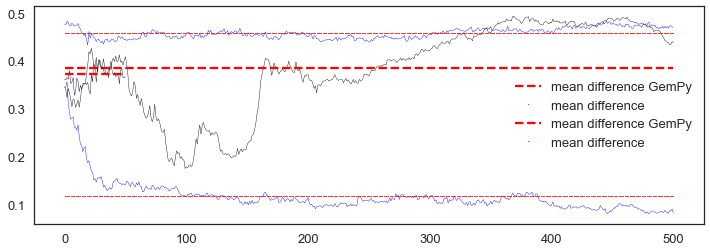

In [136]:
% matplotlib inline
plt.figure(figsize=(12,4))
plt.plot(range(0,len(labels_with_gempy)), 
         np.asarray(diff_with_gempy)/len(labels_with_gempy[-1]), 
         'k', linewidth=0.4)
plt.plot(range(0,len(labels_with_gempy)), 
         np.ones(len(labels_with_gempy))*np.mean(diff_with_gempy)/len(labels_with_gempy[-1]),
         'r--',label='mean difference GemPy')
plt.plot(range(0,len(labels_without_gempy)), 
         np.asarray(diff_without_gempy)/len(labels_without_gempy[-1]), 
         'b', linewidth=0.4)
plt.plot(range(0,len(labels_without_gempy)), 
         np.ones(len(labels_without_gempy))*np.mean(diff_without_gempy)/len(labels_without_gempy[-1]),
         'r.',label='mean difference',markersize = 2)
plt.plot(range(0,len(labels_with_gempy2)), 
         np.asarray(diff_with_gempy2)/len(labels_with_gempy2[-1]), 
         'k', linewidth=0.4)
plt.plot(range(0,len(labels_with_gempy2)), 
         np.ones(len(labels_with_gempy2))*np.mean(diff_with_gempy2)/len(labels_with_gempy2[-1]),
         'r--',label='mean difference GemPy')
plt.plot(range(0,len(labels_without_gempy2)), 
         np.asarray(diff_without_gempy2)/len(labels_without_gempy2[-1]), 
         'b', linewidth=0.4)
plt.plot(range(0,len(labels_without_gempy2)), 
         np.ones(len(labels_without_gempy2))*np.mean(diff_without_gempy2)/len(labels_without_gempy2[-1]),
         'r.',label='mean difference',markersize = 2)

plt.legend()

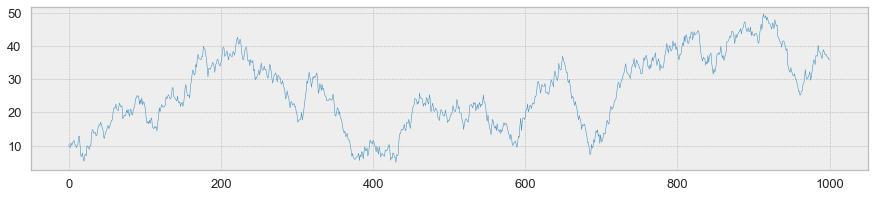

In [47]:
plt.figure(figsize=(15,3))
plt.plot(np.arange(1001), clf.betas[300:], linewidth = 0.5)

In [414]:
# 25 boreholes (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.115
Diff: 0.065


In [328]:
# 10 boreholes (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.027
Diff: 0.012


In [376]:
# 4 boreholes (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.055
Diff: 0.028


In [442]:
# 1 borehole (100 iter)
print('Mean:', np.round(np.mean(diff)/len(clf.labels[-1]),3))
print('Diff:', np.round(diff[-1]/len(clf.labels[-1]),3))

Mean: 0.235
Diff: 0.237


In [2]:
mean_4 = [0.128, 0.060, 0.018, 0.037]
diff_4 = [0.116, 0.042, 0.013, 0.014]
mean_5_5 = [0.235, 0.055, 0.027, 0.075]
diff_5_5 = [0.237, 0.028, 0.012, 0.035]
n_boreholes = [1, 2, 3, 4]

In [3]:
import pylab as plt

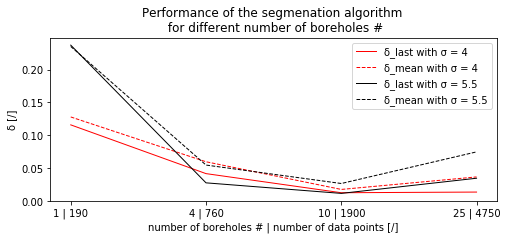

In [9]:
plt.figure(figsize=(8,3))
plt.plot(n_boreholes, diff_4 ,'r', linewidth=1,label='δ_last with σ = 4')
plt.plot(n_boreholes, mean_4 ,'r--', linewidth=1,label='δ_mean with σ = 4')
plt.plot(n_boreholes, diff_5_5 ,'k', linewidth=1,label='δ_last with σ = 5.5')
plt.plot(n_boreholes, mean_5_5 ,'k--', linewidth=1,label='δ_mean with σ = 5.5')
plt.title('Performance of the segmenation algorithm \n for different number of boreholes #')
plt.xlabel('number of boreholes # | number of data points [/]')
plt.ylabel('δ [/]')
labels = ['1 | 190', '4 | 760', '10 | 1900', '25 | 4750']
plt.xticks(n_boreholes,labels)
plt.legend()
